In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

В качестве непрерывного распределения выбрано [распределение Парето](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE). 
Распределение Парето имеет следующие характеристики:
* Параметр $b > 0$ (в вики дан параметр $x_m > 0$, но в scipy по умолочанию берётся 1)
* Функция распределения:
$$f(x,b)=\frac{b}{x^{b+1}}, x 	\geqslant 1$$
* Математическое ожидание:
$$\frac{b}{b+1}, b>1$$
* Дисперсия:
$$\left(\frac{1}{b-1}\right)^2\frac{b}{b-2}, b>2$$

Генерируем выборку и рисуем диаграмму вместе с теоретической плотностью распределения.

In [64]:
b = 3

rv_pareto = sts.pareto(b)
sample = rv_pareto.rvs(size=1000)

Text(0.5, 0, '$x$')

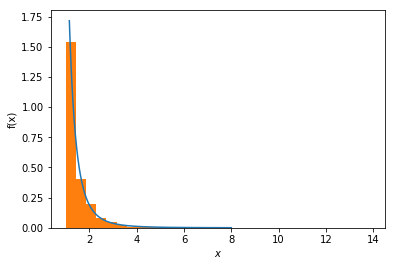

In [127]:
x = np.linspace(1.15, 8, 1000) # 1.15 для масштаба
pdf = rv_pareto.pdf(x)

plt.plot(x, pdf)
plt.hist(sample, bins=30, normed=True); # подправил бинс
plt.ylabel('f(x)')
plt.xlabel('$x$')

Определяем функцию, которая рисует распределение выборочных средних для выборок заданного объёма и плотности нормальных распределений с параметрами, рассчитанными из выборок согласно ЦПТ

In [78]:
import math

In [120]:
def sample_mean_and_norm_pdf(n, to=3, bins=20):
    means = [np.mean(s) for s in [rv_pareto.rvs(size=n) for i in range(1000)]]
    
    p_mean, p_std  = rv_pareto.mean(), rv_pareto.std()/math.sqrt(n)
    x = np.linspace(1.15, to, 100)
    rv_normal = sts.norm(p_mean, p_std)
    normal_pdf = rv_normal.pdf(x)
    
    plt.plot(x, normal_pdf)
    plt.hist(means, bins=bins, normed=True)
    plt.ylabel('f(x)')
    plt.xlabel('$x$')

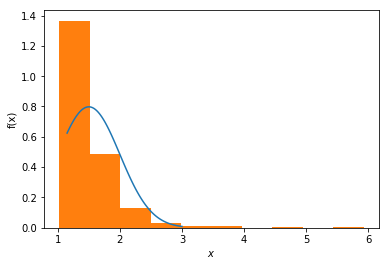

In [121]:
sample_mean_and_norm_pdf(3, 3, 10)

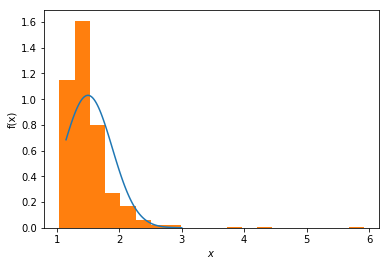

In [122]:
sample_mean_and_norm_pdf(5, 3)

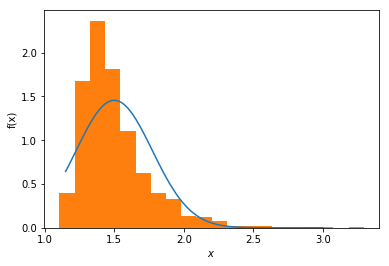

In [123]:
sample_mean_and_norm_pdf(10, 3)

Как видно, распределение стремится к нормальному, но всё ещё смещено. Избавимся от этого, увеличив $n$

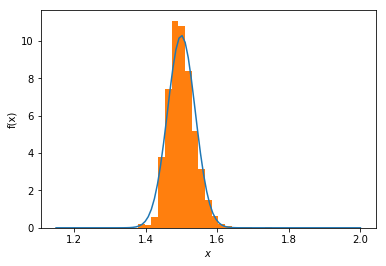

In [124]:
sample_mean_and_norm_pdf(500, 2, 20)

### Вывод
С ростом $n$ распределение выборочных средних распределения Парето все болье приближется к нормальному с параметрами, определенными ЦПТ, что на практике подтверждает её корректность. Сам объём выборки, когда аппроксимация становится хорошей, зависит от изначальной смещенности распределения, как в данном случае.